In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
import os

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
folder_path = '/content/drive/My Drive/CSE-CIC-IDS2018/'

In [4]:
parquet_files = [
    'Web2-Friday-23-02-2018_TrafficForML_CICFlowMeter.parquet',
    'Web1-Thursday-22-02-2018_TrafficForML_CICFlowMeter.parquet',
    'Infil2-Thursday-01-03-2018_TrafficForML_CICFlowMeter.parquet',
    'Infil1-Wednesday-28-02-2018_TrafficForML_CICFlowMeter.parquet',
    'DoS2-Friday-16-02-2018_TrafficForML_CICFlowMeter.parquet',
    'DoS1-Thursday-15-02-2018_TrafficForML_CICFlowMeter.parquet',
    'DDoS2-Wednesday-21-02-2018_TrafficForML_CICFlowMeter.parquet',
    'DDoS1-Tuesday-20-02-2018_TrafficForML_CICFlowMeter.parquet',
    'Bruteforce-Wednesday-14-02-2018_TrafficForML_CICFlowMeter.parquet',
    'Botnet-Friday-02-03-2018_TrafficForML_CICFlowMeter.parquet'
]

In [5]:
dataframes = [pd.read_parquet(os.path.join(folder_path, file)) for file in parquet_files]
complete_data = pd.concat(dataframes, ignore_index=True)

In [6]:
print("First few rows of the dataset:")
print(complete_data.head())
print("\nDescriptive Statistics:")
print(complete_data.describe())
print("\nColumn Names:")
print(complete_data.columns)

First few rows of the dataset:
   Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0         6        1532698                 11                      11   
1        17      117573855                  3                       0   
2        17      117573848                  3                       0   
3         6        1745392                 11                      11   
4        17       89483474                  6                       0   

   Fwd Packets Length Total  Bwd Packets Length Total  Fwd Packet Length Max  \
0                      1179                    1969.0                    648   
1                      1500                       0.0                    500   
2                      1500                       0.0                    500   
3                      1179                    1969.0                    648   
4                      3000                       0.0                    500   

   Fwd Packet Length Min  Fwd Packet Length Mean 

In [7]:
sns.set(style='whitegrid')

In [8]:
# Check the data types of each column
print(complete_data.dtypes)


Protocol                       int8
Flow Duration                 int64
Total Fwd Packets             int32
Total Backward Packets        int32
Fwd Packets Length Total      int32
                             ...   
Idle Mean                   float32
Idle Std                    float32
Idle Max                    float64
Idle Min                    float64
Label                        object
Length: 78, dtype: object


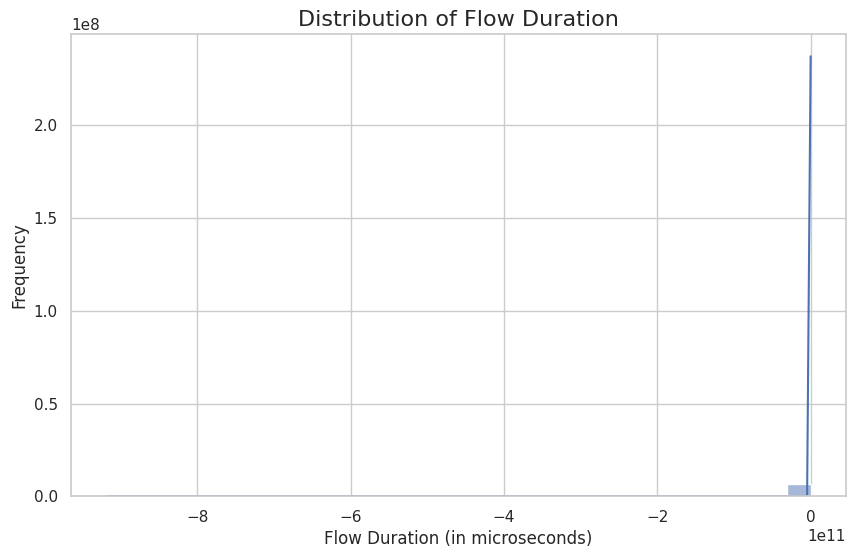

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(complete_data['Flow Duration'], bins=30, kde=True)
plt.title('Distribution of Flow Duration', fontsize=16)
plt.xlabel('Flow Duration (in microseconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<ipython-input-10-e10916fb0dd6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=complete_data, x='Label', order=complete_data['Label'].value_counts().index, palette='viridis')


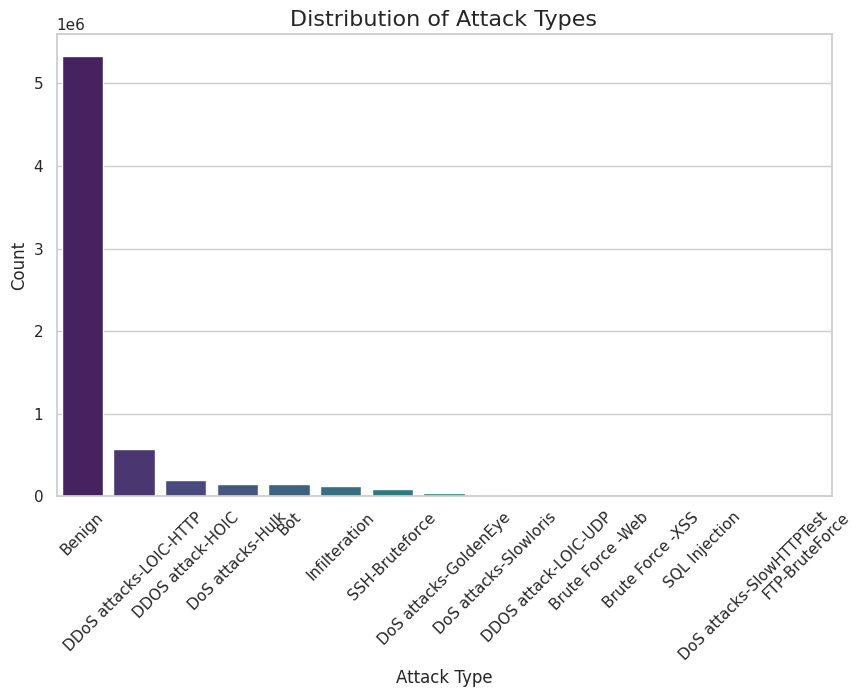

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=complete_data, x='Label', order=complete_data['Label'].value_counts().index, palette='viridis')
plt.title('Distribution of Attack Types', fontsize=16)
plt.xlabel('Attack Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [11]:
print("Data Types of Each Column:")
print(complete_data.dtypes)

Data Types of Each Column:
Protocol                       int8
Flow Duration                 int64
Total Fwd Packets             int32
Total Backward Packets        int32
Fwd Packets Length Total      int32
                             ...   
Idle Mean                   float32
Idle Std                    float32
Idle Max                    float64
Idle Min                    float64
Label                        object
Length: 78, dtype: object


In [12]:
label_encoder = LabelEncoder()
complete_data['Label'] = label_encoder.fit_transform(complete_data['Label'])

In [13]:
print("Unique Values After Encoding:")
print(complete_data['Label'].unique())


Unique Values After Encoding:
[ 0  2  3 13 12  9  8  7 10  5  4  6 11 14  1]


In [14]:
label_mapping = {
    0: 'Benign',
    1: 'DoS',
    2: 'DDoS',
    3: 'Port Scan',
    4: 'Brute Force',
    5: 'Botnet',
    6: 'Infiltration',
    7: 'Web Attack',
    8: 'SQL Injection',
    9: 'XSS',
    10: 'Malicious File',
    11: 'DDOS Attack',
    12: 'Password Guessing',
    13: 'Information Theft',
    14: 'Other Attacks'
}

In [15]:
complete_data['Label'] = complete_data['Label'].map(label_mapping)


<ipython-input-16-39ef4d8c4905>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=complete_data, x='Label', palette='viridis')


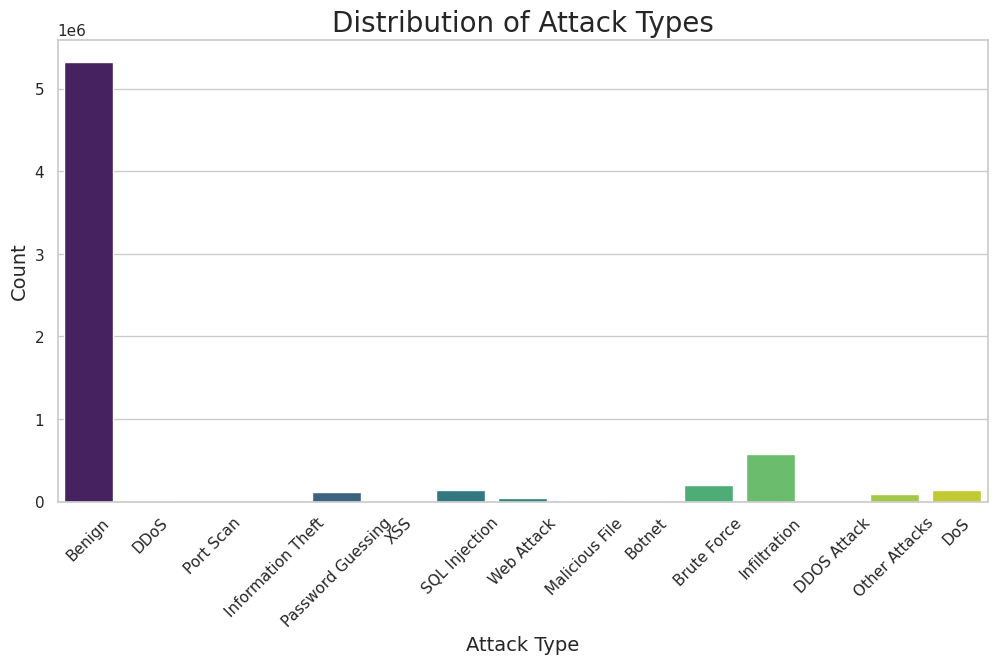

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(data=complete_data, x='Label', palette='viridis')
plt.title('Distribution of Attack Types', fontsize=20)
plt.xlabel('Attack Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

<ipython-input-17-4f8bdd36cec9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='Flow Duration', data=complete_data, palette='Set2')


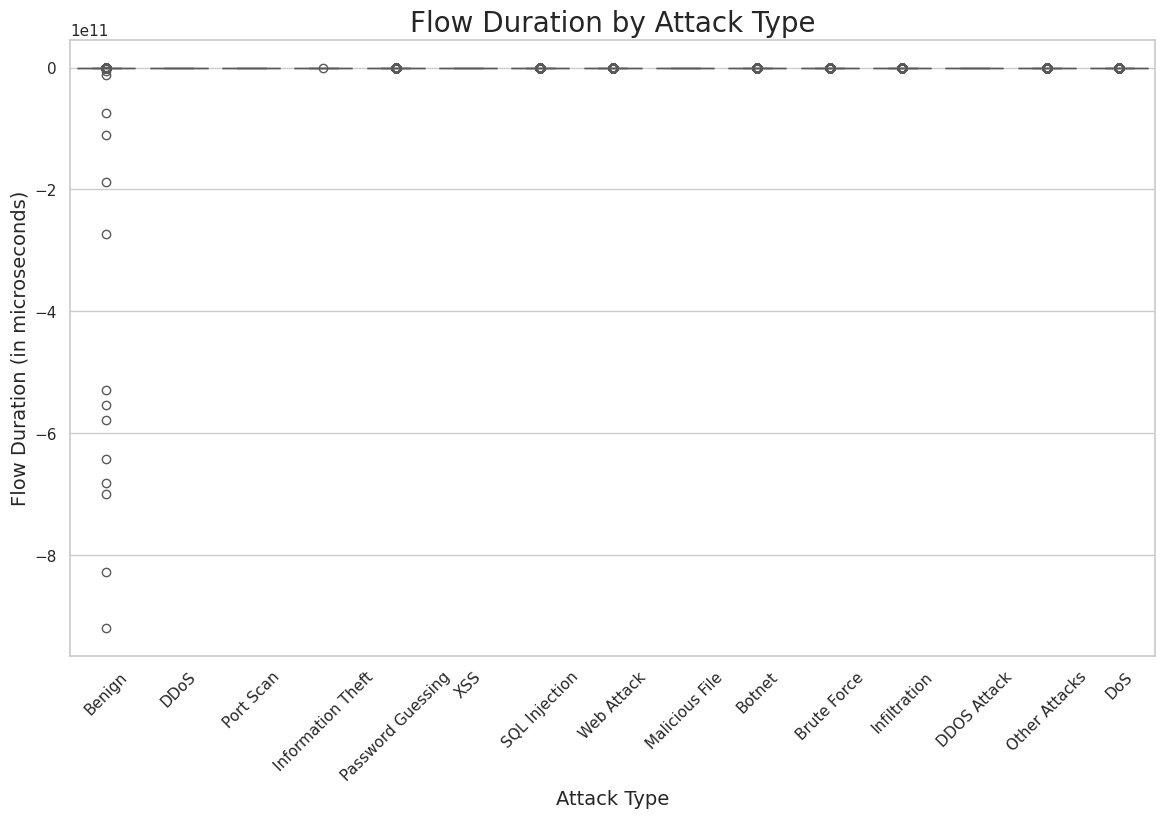

In [17]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Label', y='Flow Duration', data=complete_data, palette='Set2')
plt.title('Flow Duration by Attack Type', fontsize=20)
plt.xlabel('Attack Type', fontsize=14)
plt.ylabel('Flow Duration (in microseconds)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [18]:
sample_data = complete_data.sample(frac=0.1)  # Adjust the fraction as needed


<Figure size 1200x1200 with 0 Axes>

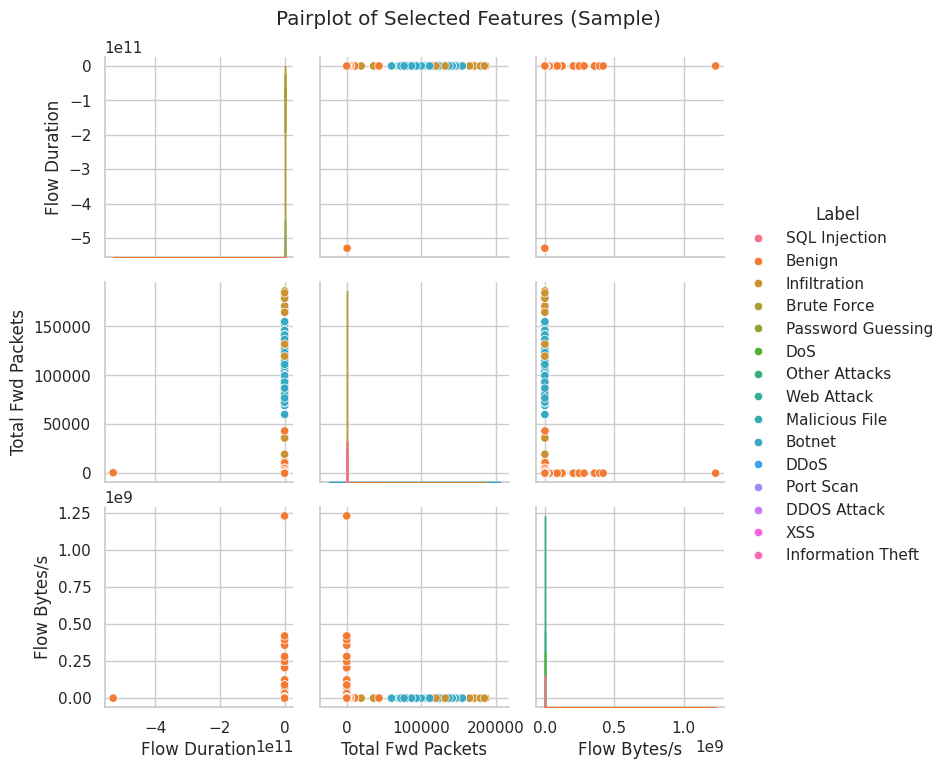

In [19]:
plt.figure(figsize=(12, 12))
sns.pairplot(sample_data[['Flow Duration', 'Total Fwd Packets', 'Flow Bytes/s', 'Label']],
             hue='Label', diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Selected Features (Sample)', y=1.02)
plt.show()


In [20]:
numeric_data = complete_data.select_dtypes(include='number')


In [21]:
top_features = numeric_data.corr().nlargest(10, 'Flow Duration').index


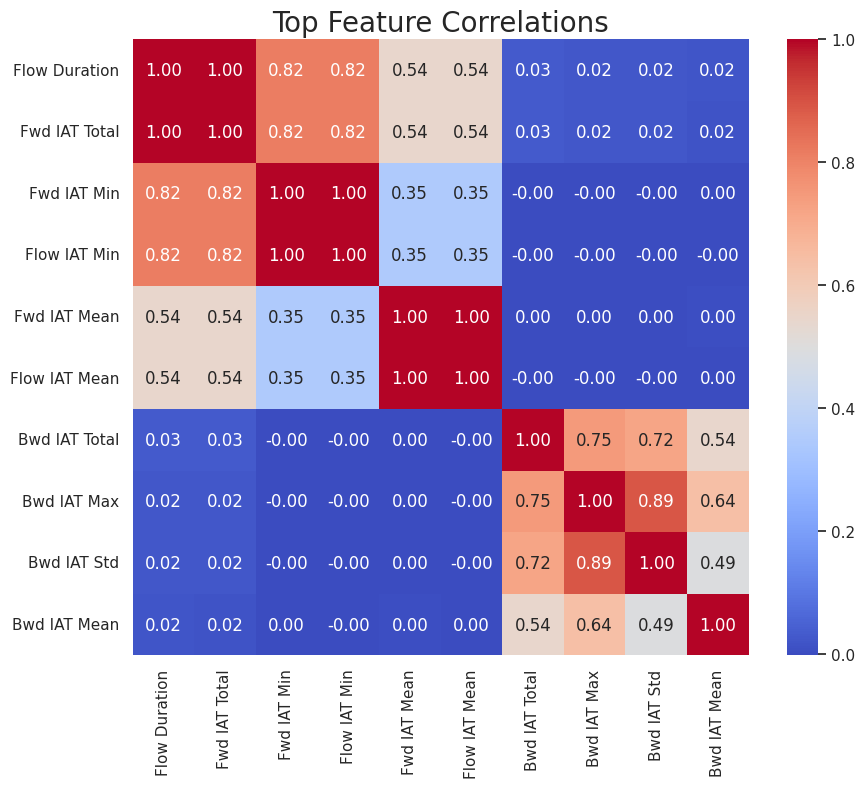

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data[top_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Top Feature Correlations', fontsize=20)
plt.show()

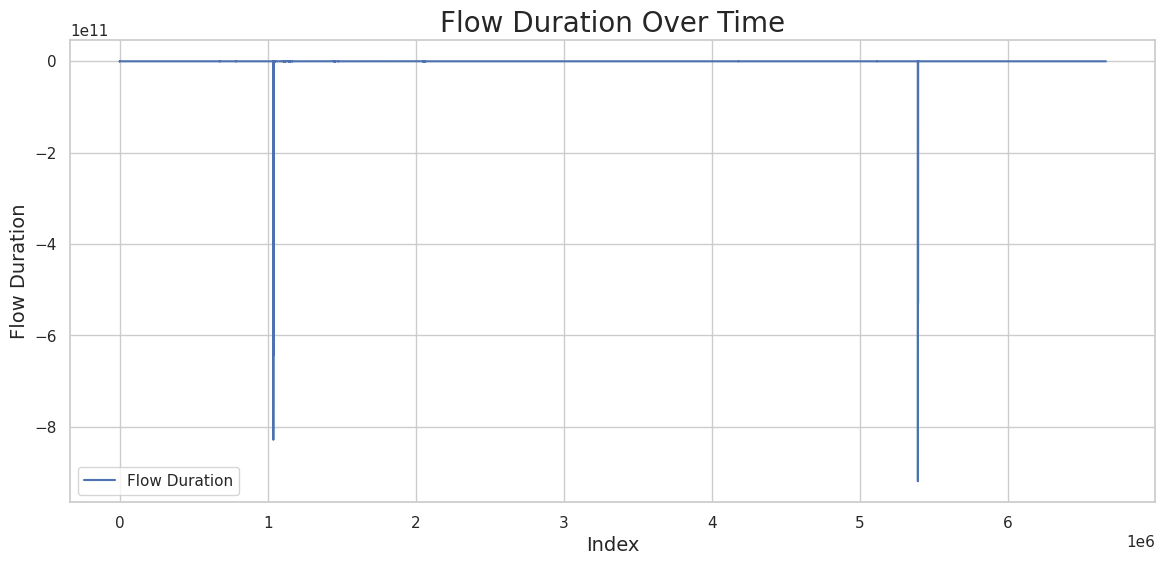

In [23]:
plt.figure(figsize=(14, 6))
plt.plot(complete_data['Flow Duration'], label='Flow Duration', color='b')
plt.title('Flow Duration Over Time', fontsize=20)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Flow Duration', fontsize=14)
plt.legend()
plt.show()